In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv(r"C:\Users\H P\Downloads\customer_booking.csv", encoding = 'ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [49]:
df.shape

(50000, 14)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [52]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [53]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [54]:
len(df['route'].value_counts())

799

In [55]:
len(df['booking_origin'].value_counts())

104

In [56]:
df.dtypes.value_counts()

int64      8
object     5
float64    1
dtype: int64

In [57]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [58]:
df.duplicated().sum()

719

In [59]:
df.drop_duplicates(inplace = True)

In [60]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


# Exploring The Dataset by Visualizing

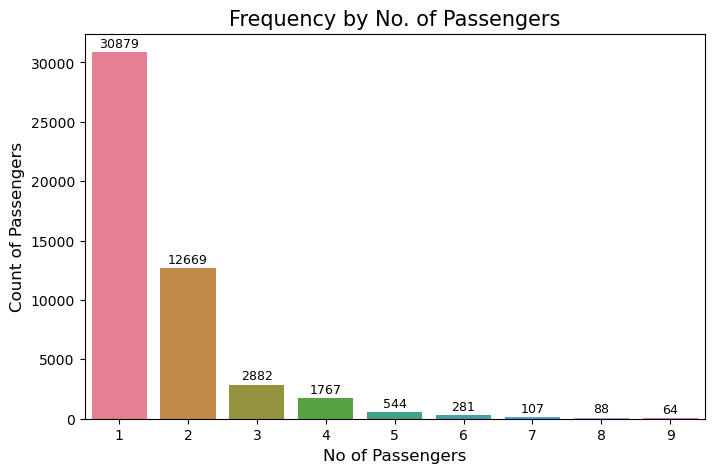

In [61]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='num_passengers', data=df, palette='husl')

plt.title('Frequency by No. of Passengers', fontsize=15)
plt.xlabel('No of Passengers', fontsize=12)
plt.ylabel('Count of Passengers', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize=9)


plt.show()

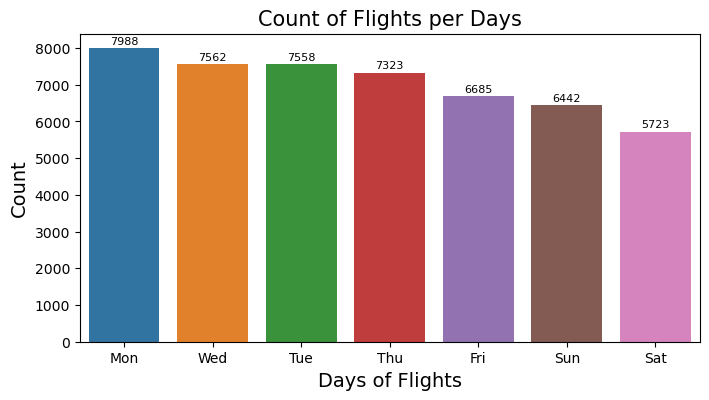

In [62]:
plt.figure(figsize = (8, 4))
ax = sns.countplot(data = df, x = 'flight_day', order = df['flight_day'].value_counts().index)

plt.title('Count of Flights per Days', fontsize = 15)
plt.xlabel('Days of Flights', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize = 8)
plt.show()

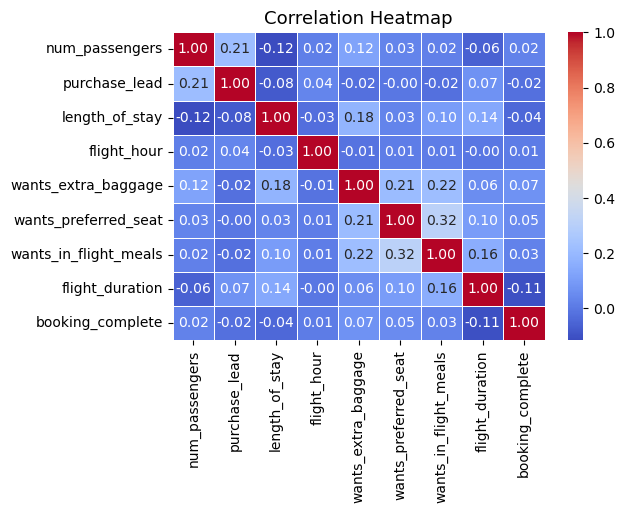

In [115]:
plt.figure(figsize=(6, 4))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize = 13)
plt.show()

In [66]:
fig = px.pie(df, names='flight_day', values='flight_hour', title='Flight Hours Distribution by Days')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [67]:
df.drop(columns = ['route', 'booking_origin'], inplace = True, axis = 1)

In [68]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,1,0,1,5.62,0


# Selecting Features and Labels

In [69]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [70]:
print(X[:10])

[[2 'Internet' 'RoundTrip' 262 19 7 'Sat' 1 0 0 5.52]
 [1 'Internet' 'RoundTrip' 112 20 3 'Sat' 0 0 0 5.52]
 [2 'Internet' 'RoundTrip' 243 22 17 'Wed' 1 1 0 5.52]
 [1 'Internet' 'RoundTrip' 96 31 4 'Sat' 0 0 1 5.52]
 [2 'Internet' 'RoundTrip' 68 22 15 'Wed' 1 0 1 5.52]
 [1 'Internet' 'RoundTrip' 3 48 20 'Thu' 1 0 1 5.52]
 [3 'Internet' 'RoundTrip' 201 33 6 'Thu' 1 0 1 5.52]
 [2 'Internet' 'RoundTrip' 238 19 14 'Mon' 1 0 1 5.52]
 [1 'Internet' 'RoundTrip' 80 22 4 'Mon' 0 0 1 5.52]
 [1 'Mobile' 'RoundTrip' 378 30 12 'Sun' 0 0 0 5.52]]


In [71]:
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


# Encoding The Categorical Variables

In [75]:
from sklearn.preprocessing import LabelEncoder

le_1 = LabelEncoder()
le_2 = LabelEncoder()
le_3 = LabelEncoder()

X[:, 1] = le_1.fit_transform(X[:, 1])
X[:, 2] = le_2.fit_transform(X[:, 2])
X[:, 6] = le_3.fit_transform(X[:, 6])

In [76]:
print(X[:10])

[[2 0 2 262 19 7 2 1 0 0 5.52]
 [1 0 2 112 20 3 2 0 0 0 5.52]
 [2 0 2 243 22 17 6 1 1 0 5.52]
 [1 0 2 96 31 4 2 0 0 1 5.52]
 [2 0 2 68 22 15 6 1 0 1 5.52]
 [1 0 2 3 48 20 4 1 0 1 5.52]
 [3 0 2 201 33 6 4 1 0 1 5.52]
 [2 0 2 238 19 14 1 1 0 1 5.52]
 [1 0 2 80 22 4 1 0 0 1 5.52]
 [1 1 2 378 30 12 3 0 0 0 5.52]]


# Splitting up into Traininng and Testing Sets

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [78]:
print(len(X_train))

39424


In [79]:
print(len(X_test))

9857


# Feature Selection using MinMax Scaler

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [89]:
print(X_train[:10])

[[0.375      0.         1.         0.07958478 0.00514139 0.04347826
  0.66666667 1.         0.         0.         0.3436853 ]
 [0.125      0.         1.         0.14532872 0.0218509  0.13043478
  0.66666667 1.         0.         0.         0.86128364]
 [0.125      0.         1.         0.02306805 0.00642674 1.
  0.16666667 1.         0.         0.         0.19668737]
 [0.         0.         1.         0.02883506 0.03598972 0.34782609
  0.66666667 1.         0.         0.         0.17598344]
 [0.25       0.         1.         0.26643599 0.08226221 0.56521739
  0.83333333 1.         0.         1.         0.86128364]
 [0.         0.         1.         0.0461361  0.02313625 0.52173913
  0.5        0.         1.         1.         0.3436853 ]
 [0.         0.         1.         0.05074971 0.00514139 0.47826087
  0.         1.         0.         0.         0.19668737]
 [0.         0.         1.         0.01038062 0.00642674 0.04347826
  0.83333333 0.         1.         0.         0.80952381]


In [90]:
print(X_test[:10])

[[0.         0.         1.         0.0521327  0.05980066 0.60869565
  0.5        1.         0.         1.         0.86128364]
 [0.125      0.         1.         0.00631912 0.00830565 0.65217391
  0.33333333 1.         0.         0.         0.86128364]
 [0.         0.         1.         0.00947867 0.03820598 0.52173913
  0.66666667 1.         0.         1.         0.19668737]
 [0.         0.         1.         0.03475513 0.11627907 0.17391304
  0.         1.         0.         1.         0.19668737]
 [0.         0.         1.         0.01105845 0.0282392  0.39130435
  0.83333333 0.         1.         0.         0.48240166]
 [0.125      0.         0.5        0.15165877 0.03654485 0.04347826
  0.33333333 1.         0.         1.         0.86128364]
 [0.         0.         1.         0.00157978 0.09966777 0.
  0.83333333 1.         0.         0.         0.36231884]
 [0.25       1.         1.         0.23380727 0.00664452 0.2173913
  0.33333333 1.         0.         0.         0.86128364]
 

# Training A model using Random Forest Classification

In [91]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

# Predicting the test set results

In [92]:
print(model.predict(scaler.fit_transform([[2, 0, 2, 68, 22, 15, 6, 1, 0, 1, 5.52]])))

[0]


The Prediction is correct as the Passenger Booking didn't Confirm

# Now Predicting the Test and Train Set

In [93]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Merging Actual Train and Predicted Train

In [96]:
Train_Result = pd.DataFrame({
    'Actual' : y_train,
    'Predicted' : y_train_pred
})
Train_Result.head(20)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


# Merging Actual Test and Predicted Test

In [97]:
Test_Result = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_test_pred
})
Test_Result.head(20)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


# Building Cross Validation Score using Accuracy

In [98]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')
print("Cross-validated scores:", scores)

Cross-validated scores: [0.84954854 0.82741477 0.77414773 0.38565341 0.3961039 ]


# Evaluating Model

In [102]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix of Training Set:\n", cm_train)
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix of Testing Set:\n", cm_test)

print()

clf_train = classification_report(y_train, y_train_pred)
print("Classification Report of Training Set:\n", clf_train)
clf_test = classification_report(y_test, y_test_pred)
print("Classification Report of Testing Set:\n", clf_test)

print()

acc_scores_train = accuracy_score(y_train, y_train)
print("Accuracy Score of Training Set:", acc_scores_train)
acc_scores_test = accuracy_score(y_test, y_test_pred)
print("Accuracy Score of Testing Set:", acc_scores_test)

Confusion Matrix of Training Set:
 [[33512     0]
 [   12  5900]]
Confusion Matrix of Testing Set:
 [[8276  102]
 [1423   56]]

Classification Report of Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33512
           1       1.00      1.00      1.00      5912

    accuracy                           1.00     39424
   macro avg       1.00      1.00      1.00     39424
weighted avg       1.00      1.00      1.00     39424

Classification Report of Testing Set:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      8378
           1       0.35      0.04      0.07      1479

    accuracy                           0.85      9857
   macro avg       0.60      0.51      0.49      9857
weighted avg       0.78      0.85      0.79      9857


Accuracy Score of Training Set: 1.0
Accuracy Score of Testing Set: 0.8452876128639546


# Visualization of Training and Testing Set

In [103]:
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

roc_auc = auc(fpr, tpr)
roc_auc_test = auc(fpr_test, tpr_test)

In [104]:
roc_auc

0.9999996365892888

In [105]:
roc_auc_test

0.6461292825425293

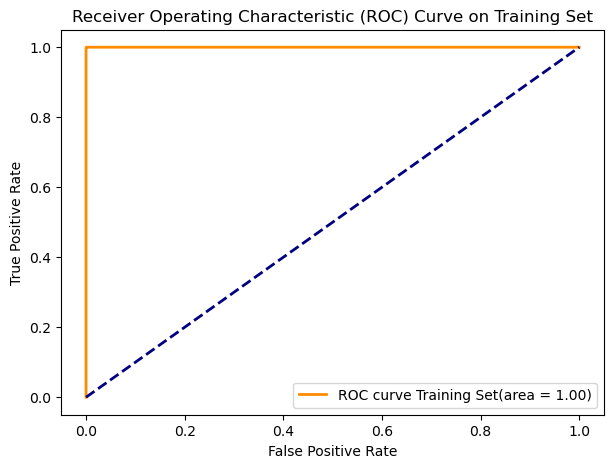

In [111]:
# Plot ROC curve of Training Set

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve Training Set(area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Training Set')
plt.legend(loc = 'lower right')
plt.show()

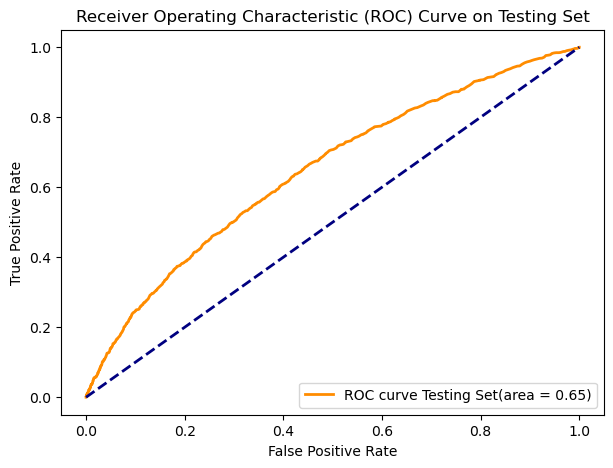

In [112]:
# Plot ROC curve
plt.figure(figsize = (7, 5))
plt.plot(fpr_test, tpr_test, color = 'darkorange', lw = 2, label = 'ROC curve Testing Set(area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Testing Set')
plt.legend(loc = 'lower right')
plt.show()